# ASCII rendering of webcam feed

In [2]:
import cv2
import numpy as np
import matplotlib as plt
from PIL import ImageFont, ImageDraw, Image
import matplotlib.pyplot as plt
from webcam import stopButton, view
import threading
from time import time
import contextlib

# Timer
@contextlib.contextmanager
def timer(msg):
    tic = time()
    yield
    print(msg + ": %.2f s" % (time() - tic))

## Generate the character gray scale

Here, I plot every character in an image and measure the color density as $\frac{# pixels drawn}{total # pixels}$. I will use japanese characters as they are squared (unlike alphabet). I use the list of [jouyou characters](http://nihongo.monash.edu/jouyoukanji.html) (~1000 most basic Kanjis), plus punctuation.

### Setup images and font

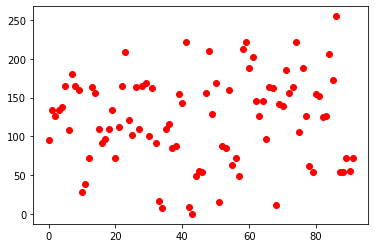

In [3]:
chars = "1234567890-^¥qwertyuiop@asdfghjkl;:zxcvbnm,./_!#$%&'()0=~|QWERTYUIOP`ASDFGHJKL+*ZXCVBNM<>?_　"

width = 256
height = 256
channel = 3
density = np.zeros(len(chars))
for i, k in enumerate(chars):
    img = np.zeros((width,height,channel),dtype=np.uint8)*255
    cv2.putText(img,k, (0,22), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 1)
    density[i] = np.sum(img)/(width*height*channel)
density = (density-np.min(density))/(np.max(density)-np.min(density))*255.0
plt.plot(density,'or')

In [4]:
# Create a dictionnary
dens2char = {}
for i in range(256):
    dens2char[i] = chars[np.argmin((density-i)**2)]

## Filter

In [5]:
def char_filter(img, fn_dict=None):
    if fn_dict:
        fac = fn_dict['fac']
    else:
        fac = 0.1
    out_size = [int(img.shape[0]*fac), int(img.shape[1]*fac)]
    ref_fontsize = 28.0
    char_size = int(img.shape[0]/out_size[0])
    
    img_in = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
    img_in = cv2.resize(img_in, dsize=[out_size[1], out_size[0]])

    img_out = np.zeros(img.shape,dtype=np.uint8)*255    

    for i in range(out_size[0]):
        for j in range(out_size[1]):
            cv2.putText(img_out,dens2char[img_in[i,j]], (j*char_size, int(i*char_size+char_size)), cv2.FONT_HERSHEY_SIMPLEX, char_size/ref_fontsize, (255,255,255), 1)
    return np.array(img_out)

## Display webcam feed and apply filter (in notebook)

ToggleButton(value=False, description='Stop', icon='square', tooltip='Description')

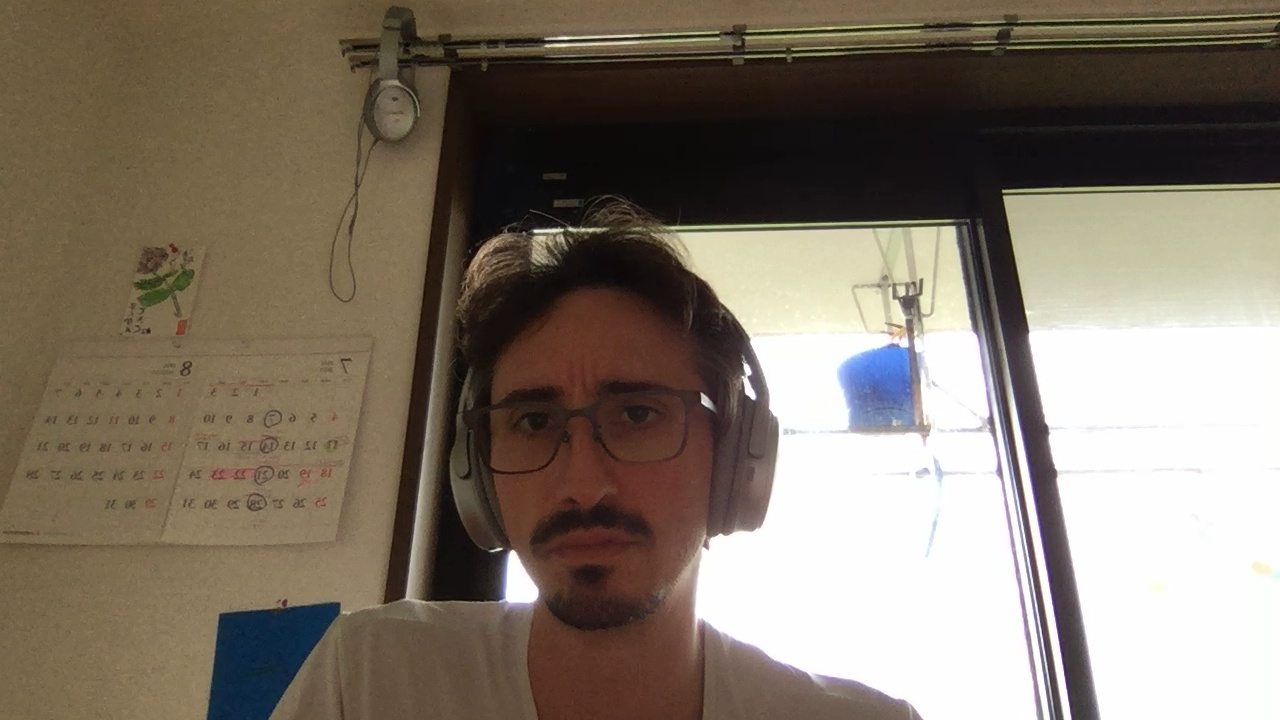

KeyboardInterrupt: 

In [6]:
stopButton.value=False
display(stopButton)   

fn_dict = {"fac":.1}
thread = threading.Thread(target=view, args=(stopButton, char_filter, fn_dict))
thread.start()
# view(stopButton)

## Display webcam feed and apply filter (in separate windown)

In [1]:
# cap = cv2.VideoCapture(0)
# cap.set(3,640*2) # adjust width
# cap.set(4,480*2) # adjust height
# while True:
#     success, img = cap.read()
#     img = np.concatenate([img, char_filter(img, {"fac":0.1})])
    

#     cv2.imshow("Webcam", img)
#     if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
        
#         cap.release()
#         break
        
# cv2.destroyAllWindows() 
# cv2.waitKey(1)